In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=28de3c7904879696b47cae960fb461b11aa140bfeb0595b818d935d6d7e359ba
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf

In [ ]:
yf.pdr_override()

In [ ]:
start = '2020-01-01'
end = '2021-01-01'

In [ ]:
data = web.get_data_yahoo('NVDA', start=start, end=end)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.844322,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.886452,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.133400,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.849308,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.961559,27710800


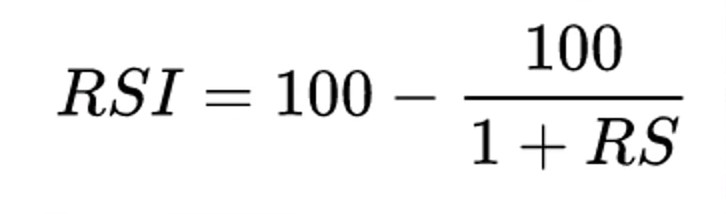

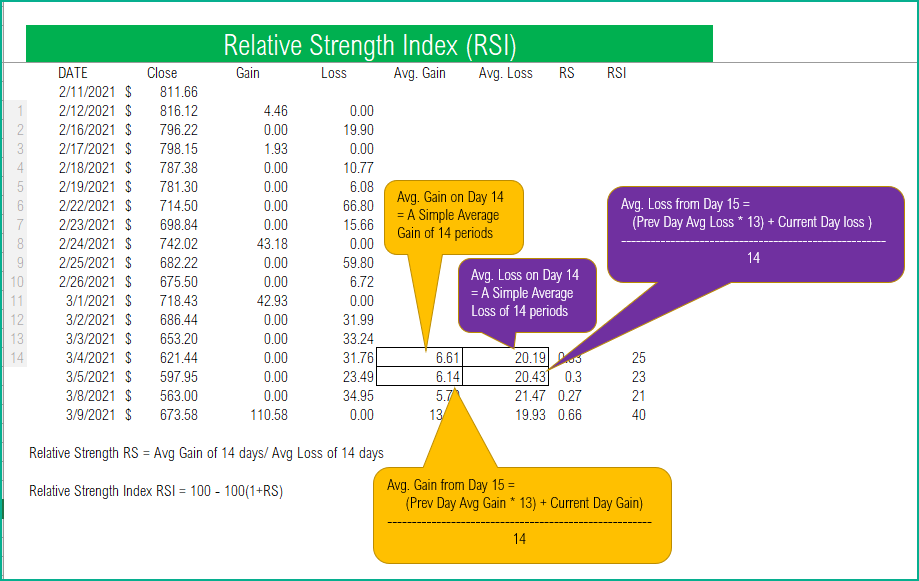

In [ ]:
def rsi_func(df, days=14,lower=30,upper=70):
    chg = df['Close'].diff(1)
    
    gain = chg.mask(chg<0,0) #if chg < 0 then value = 0 
    loss = chg.mask(chg>0,0)  #if chg > 0 then value = 0 
    avg_gain = gain.rolling(days).mean()  #by default min_periods = window
    avg_loss = abs(loss.rolling(days).mean()) #by default min_periods = window
    rs = avg_gain/avg_loss
    rsi = 100 - (100/(1+rs))
    df['rsi'] = rsi
    
    
    #Find action zone

    df.loc[(df['rsi'] > upper), 'action'] = 'sell'
    df.loc[(df['rsi'] < lower), 'action'] = 'buy'
    df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] * 0.98
    df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] * 1.02

    return df

In [ ]:
rsi_starter = rsi_func(data, days=14)
rsi_starter[rsi_starter.action.notnull()].head()

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position
Date,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,62.480949,37351200,70.781658,sell,66.172500
2020-02-14,71.815002,73.742500,71.500000,72.447502,72.286629,104192400,80.219362,sell,75.217350
2020-02-18,71.410004,74.327499,71.214996,74.142502,73.977867,62016400,79.977776,sell,75.814049
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.500298,69433200,85.737897,sell,80.429551
2020-02-20,78.192497,79.080002,74.087502,77.175003,77.003632,81005200,80.681034,sell,80.661602


In [ ]:
!pip install mplfinance

     |████████████████████████████████| 62 kB 621 kB/s 


In [ ]:
import mplfinance as mpf

def rsi_plot(df_plot,lower=30,mid=50,upper=70):
    df = rsi_func(df_plot)
    
    df['lower'] = lower
    df['upper'] = upper
    df['mid'] = mid
    rsi_ylim = (0,100)


    # for plot rsi 
    mpf_rsi = mpf.make_addplot(df['rsi'], panel=1, color='blue', title='RSI', ylim=rsi_ylim)
    mpf_lower = mpf.make_addplot(df['lower'], panel = 1, color='orange', ylim=rsi_ylim)
    mpf_upper = mpf.make_addplot(df['upper'], panel = 1, color='orange', ylim=rsi_ylim)
    mpf_mid = mpf.make_addplot(df['mid'], panel = 1, color='gray', ylim=rsi_ylim)
    
    
    # for marker
    markers = ['^' if x == 'buy' else 'v' for x in df['action']]
    color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
    plot_signal = mpf.make_addplot(df['marker_position'], type='scatter', marker=markers, color=color_marker)
    plots = [mpf_rsi, mpf_lower, mpf_mid ,mpf_upper, plot_signal]
    
    return plots

In [ ]:
rsi_to_plot = rsi_plot(data)

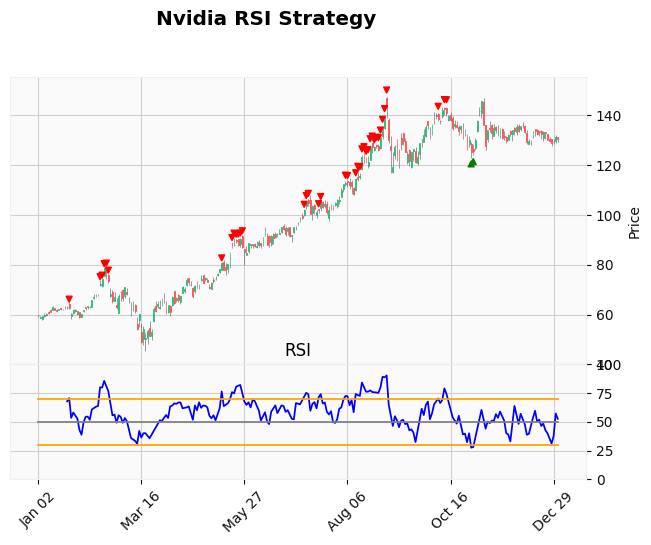

In [ ]:
mpf.plot(data, type='candle', style='yahoo', addplot=rsi_to_plot,
                       title='Nvidia RSI Strategy')

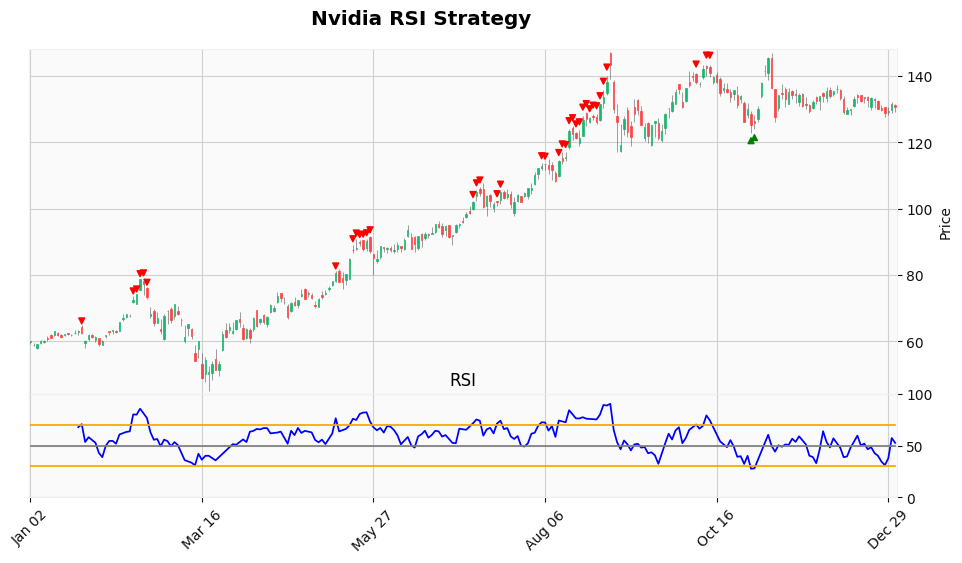

In [ ]:
mpf.plot(data, type='candle', style='yahoo', addplot=rsi_to_plot,
              title='Nvidia RSI Strategy',
              figsize = (10,6),panel_ratios =(1,0.3),
              tight_layout=True, scale_padding ={'top':5})

## จากรูป ต้อง adjust จาก 30, 70 
## เป็น 35, 52, 75

In [ ]:
rsi_starter = rsi_func(data, days=14,lower=35,upper=75)
rsi_to_plot = rsi_plot(data,lower =35, mid = 53, upper =75 )

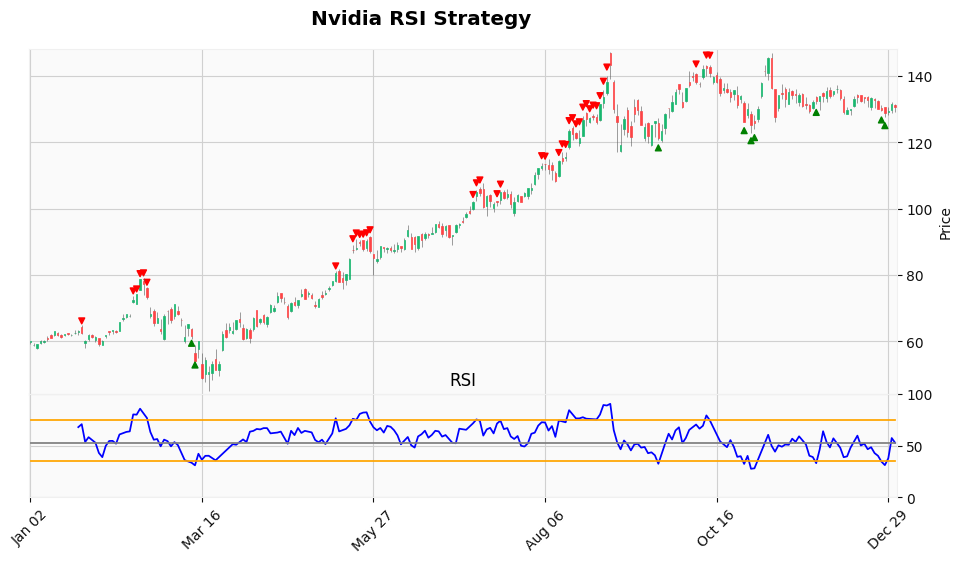

In [ ]:
mpf.plot(data, type='candle', style='yahoo', addplot=rsi_to_plot,
              title='Nvidia RSI Strategy',
              figsize = (10,6),panel_ratios =(1,0.3),
              tight_layout=True, scale_padding ={'top':5})

# แต่นี่ไม่ใช่สิ่งที่เราต้องการ เพราะมันได้เป็น action zone ไม่ใช่ signal

In [ ]:
action_data = data.copy()

In [ ]:
action_data

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid
Date,,,,,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.844322,23753600,NaN,NaN,NaN,35,75,53
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.886452,20538400,NaN,NaN,NaN,35,75,53
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.133400,26263600,NaN,NaN,NaN,35,75,53
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.849308,31485600,NaN,NaN,NaN,35,75,53
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.961559,27710800,NaN,NaN,NaN,35,75,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,129.862915,9788400,34.651973,buy,126.799747,35,75,53
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.925949,21256400,31.245840,buy,125.079850,35,75,53
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.358185,17037200,37.827300,NaN,NaN,35,75,53


In [ ]:
action_data['action_price'] = action_data['Open'].shift(-1)

In [ ]:
action_data.head()

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price
Date,,,,,,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.844322,23753600,NaN,NaN,NaN,35,75,53,58.775002
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.886452,20538400,NaN,NaN,NaN,35,75,53,58.080002
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.133400,26263600,NaN,NaN,NaN,35,75,53,59.549999
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.849308,31485600,NaN,NaN,NaN,35,75,53,59.939999
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.961559,27710800,NaN,NaN,NaN,35,75,53,60.962502


In [ ]:
record = action_data[action_data.action.notnull()]
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price
Date,,,,,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,62.480949,37351200,70.781658,sell,66.172500,35,75,53,59.560001
2020-02-14,71.815002,73.742500,71.500000,72.447502,72.286629,104192400,80.219362,sell,75.217350,35,75,53,71.410004
2020-02-18,71.410004,74.327499,71.214996,74.142502,73.977867,62016400,79.977776,sell,75.814049,35,75,53,75.372498
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.500298,69433200,85.737897,sell,80.429551,35,75,53,78.192497
2020-02-20,78.192497,79.080002,74.087502,77.175003,77.003632,81005200,80.681034,sell,80.661602,35,75,53,76.047501
2020-02-21,76.047501,76.300003,72.665001,73.517502,73.354263,76818000,76.749576,sell,77.826003,35,75,53,67.547501
2020-03-11,63.865002,64.150002,60.642502,61.617500,61.517452,49996400,33.589994,buy,59.429652,35,75,53,56.365002
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.989693,81654000,31.047083,buy,52.871001,35,75,53,57.625000
2020-05-11,78.074997,81.125000,77.787498,80.654999,80.524040,46906000,76.504649,sell,82.747500,35,75,53,81.235001


In [ ]:
record['helper'] = record.action.shift(-1)
record

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,62.480949,37351200,70.781658,sell,66.172500,35,75,53,59.560001,sell
2020-02-14,71.815002,73.742500,71.500000,72.447502,72.286629,104192400,80.219362,sell,75.217350,35,75,53,71.410004,sell
2020-02-18,71.410004,74.327499,71.214996,74.142502,73.977867,62016400,79.977776,sell,75.814049,35,75,53,75.372498,sell
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.500298,69433200,85.737897,sell,80.429551,35,75,53,78.192497,sell
2020-02-20,78.192497,79.080002,74.087502,77.175003,77.003632,81005200,80.681034,sell,80.661602,35,75,53,76.047501,sell
2020-02-21,76.047501,76.300003,72.665001,73.517502,73.354263,76818000,76.749576,sell,77.826003,35,75,53,67.547501,buy
2020-03-11,63.865002,64.150002,60.642502,61.617500,61.517452,49996400,33.589994,buy,59.429652,35,75,53,56.365002,buy
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.989693,81654000,31.047083,buy,52.871001,35,75,53,57.625000,sell
2020-05-11,78.074997,81.125000,77.787498,80.654999,80.524040,46906000,76.504649,sell,82.747500,35,75,53,81.235001,sell


In [ ]:
record = record.loc[record['helper']!=record['action']]
record = record.iloc[1:]
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.989693,81654000,31.047083,buy,52.871001,35,75,53,57.625000,sell
2020-09-02,147.037506,147.267502,139.000000,143.464996,143.340302,87401200,90.438711,sell,150.212852,35,75,53,138.287506,buy
2020-09-23,125.754997,127.269997,120.792503,121.237503,121.132111,64701200,32.571461,buy,118.376653,35,75,53,120.722504,sell
2020-10-14,142.904999,143.427505,139.600006,140.952499,140.829971,27610000,74.538299,sell,146.296056,35,75,53,138.107498,buy
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.925949,21256400,31.245840,buy,125.079850,35,75,53,129.250000,NaN


In [ ]:
record['return'] = record['action_price'].pct_change()

In [ ]:
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper,return
Date,,,,,,,,,,,,,,,
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.989693,81654000,31.047083,buy,52.871001,35,75,53,57.625000,sell,NaN
2020-09-02,147.037506,147.267502,139.000000,143.464996,143.340302,87401200,90.438711,sell,150.212852,35,75,53,138.287506,buy,1.399783
2020-09-23,125.754997,127.269997,120.792503,121.237503,121.132111,64701200,32.571461,buy,118.376653,35,75,53,120.722504,sell,-0.127018
2020-10-14,142.904999,143.427505,139.600006,140.952499,140.829971,27610000,74.538299,sell,146.296056,35,75,53,138.107498,buy,0.144008
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.925949,21256400,31.245840,buy,125.079850,35,75,53,129.250000,NaN,-0.064135


In [ ]:
record.reset_index(inplace=True)

In [ ]:
record['previous_sig_date'] = record['Date'].shift(1)
record['previous_action'] = record['action'].shift(1)
record['previous_act_price'] = record['action_price'].shift(1)
record.rename(columns={'Date':'today_sig_date'}, inplace=True)

record

,today_sig_date,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper,return,previous_sig_date,previous_action,previous_act_price
0,2020-03-12,56.365002,59.029999,53.950001,54.077499,53.989693,81654000,31.047083,buy,52.871001,35,75,53,57.625000,sell,NaN,NaT,NaN,NaN
1,2020-09-02,147.037506,147.267502,139.000000,143.464996,143.340302,87401200,90.438711,sell,150.212852,35,75,53,138.287506,buy,1.399783,2020-03-12,buy,57.625000
2,2020-09-23,125.754997,127.269997,120.792503,121.237503,121.132111,64701200,32.571461,buy,118.376653,35,75,53,120.722504,sell,-0.127018,2020-09-02,sell,138.287506
3,2020-10-14,142.904999,143.427505,139.600006,140.952499,140.829971,27610000,74.538299,sell,146.296056,35,75,53,138.107498,buy,0.144008,2020-09-23,buy,120.722504
4,2020-12-28,130.625000,130.625000,127.632500,129.000000,128.925949,21256400,31.245840,buy,125.079850,35,75,53,129.250000,NaN,-0.064135,2020-10-14,sell,138.107498


In [ ]:
record = record[['action','today_sig_date','action_price','return','previous_sig_date','previous_action','previous_act_price']]

In [ ]:
profit = record[record.action == 'sell']

In [ ]:
profit

,action,today_sig_date,action_price,return,previous_sig_date,previous_action,previous_act_price
1,sell,2020-09-02,138.287506,1.399783,2020-03-12,buy,57.625000
3,sell,2020-10-14,138.107498,0.144008,2020-09-23,buy,120.722504


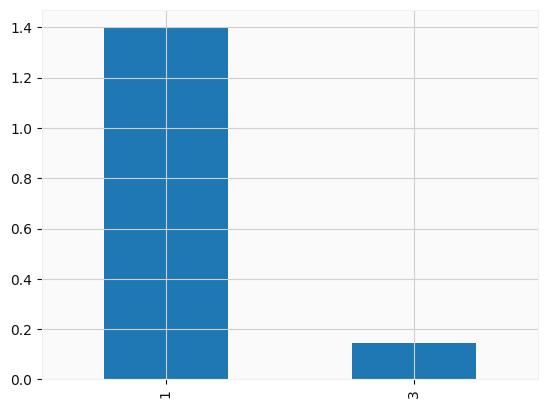

In [ ]:
profit['return'].plot(kind='bar')